# Statistika



Zahvaljujući sve većoj dostupnosti podataka, interesovanje za statističke metode sve više raste, a naročito za primenu tih metoda uz pomoć računara. Python i njegove biblioteke, sve su popularniji za statističku analizu. Biblioteke NumPy i SciPy pokrivaju osnovne statističke koncepte, dok se scikit-learn koristi za mašinsko učenje. Ovde će biti razmatran najviše modul stats iz biblioteke SciPy, koji se tiče oblasti deskriptivne statistike : nasumičnih brojeva, slučajnih promenljivih, raspodela, i testiranja hipoteza.

SciPy stats modul je nadogradnja NumPy biblioteke, sa dodatnim mogućnostima.



### Uvoz modula



In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Deskriptivna statistika



Statistika se bavi prikupljanjem i analizom podataka u svrhe sticanja znanja, zaključivanja, odlučivanja. Statistički metodi su neophodni kada su informacije nepotpune : ako je na primer nemoguće prikupiti informacije o svim članovima populacije, ili prikupljene informacije nisu precizne, zbog nesavršenosti instrumenta.

Umesto posmatranja čitave populacije, može se posmatrati nasumično izabran uzorak. I na osnovu njega doneti zaključak o čitavoj populaciji, uz rizik greške.

U teoriji verovatnoće, svaki moguć ishod ima svoju verovatnoću. Verovatnoće svih mogućih ishoda čine raspodelu verovatnoće.

Ako se zna raspodela, mogu da se izračunaju svojstva populacije, kao što su srednja vrednost ili varijansa. Ali ako se nasumično izabere uzorak, mogu samo da se znaju ocene parametara.

Biblioteka NumPy, deskriptivna statistika :



In [2]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

Srednja vrednost :



In [3]:
np.mean(x)

3.1

Medijana :



In [4]:
np.median(x)

3.0

Minimum, maksimum :



In [5]:
x.min(), x.max()

(0.9, 6.7)

Varijansa i standardna devijacija : bez dodatnih parametara, koriste se formule kao da se radi sa celom populacijom.



In [6]:
x.var()

3.0700000000000007

In [7]:
x.std()

1.7521415467935233

Da bi se koristile formule kao da se radi sa uzorkom, može se podesiti argument ddof (delta degrees of freedom). Ovaj parametar je originalno nula, a predstavlja umanjilac u imeniocu.



In [8]:
x.var(ddof=1)

3.5085714285714293

In [9]:
x.std(ddof=1)

1.8731181032095732

### Slučajni brojevi



Standardna biblioteka jezika Python sadrži modul random, kojim se mogu generisati slučajni brojevi sa nekim osnovnim raspodelama. Modul NumPy omogućava da se generišu nizovi slučajnih brojeva, koji su vrlo koristni u statističkoj analizi, a osim toga podržava veći skup raspodela.

Uniformna raspodela [0, 1)



In [10]:
np.random.rand()

0.018386995667851513

Standardna normalna raspodela (srednja vrednost 0, varijansa 1)



In [11]:
np.random.randn()

0.06541578062376471

Ove funkcije mogu da se koriste za generisanje nizova proizvoljnih dimenzija :



In [12]:
np.random.rand(4, 2, 3)

array([[[0.11586462, 0.48333822, 0.23649203],
        [0.28384068, 0.76958436, 0.40264837]],

       [[0.2429191 , 0.45414573, 0.88937942],
        [0.86159297, 0.07252103, 0.4948875 ]],

       [[0.96115954, 0.75559556, 0.21506627],
        [0.75942239, 0.40116913, 0.87548252]],

       [[0.75334584, 0.46621647, 0.46259746],
        [0.45658923, 0.440562  , 0.4912919 ]]])

Generisanje celih brojeva iz skupa {5, .., 9}



In [13]:
np.random.randint(5, 10, size=(2, 10))

array([[7, 5, 5, 8, 6, 5, 9, 5, 9, 9],
       [8, 6, 5, 8, 5, 6, 8, 9, 7, 6]])

Vizualizacija dosadašnjih raspodela



(array([1139., 1163., 1158., 1100., 1145., 1120., 1032., 1075., 1068.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <a list of 9 Patch objects>)

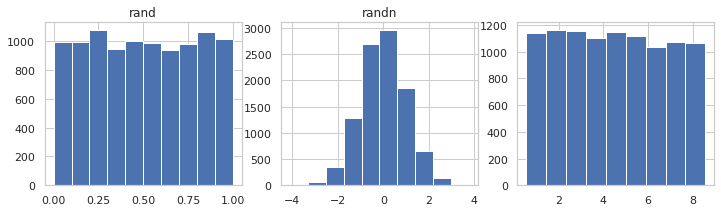

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')

Da bi se izabrao uzorak, korisno je generisati listu jedinstvenih celih brojeva. U NumPy random modulu postoji funkcija choice kojom se ovo postiže. Prvi argument je broj elemenata u populaciji. Drugi argument je broj elemenata koji izvlacimo. Treci argument govori da li se brojevi generisu sa zamenom (True) ili jedinstveno (False).



In [15]:
np.random.choice(10, 5, replace=False)

array([4, 1, 8, 2, 6])

Prilikom rada sa generisanjem slucajnih brojeva, moze se podesiti seme generatora slucajnih brojeva. To je broj od kojeg generator krece sa ra cunanjem slucajnih vrednosti, pa ce za vise puta podesenu istu vrednost, generisati identicne sekvence brojeva. Ovo moze da bude korisno u svrhe testiranja i replikacije rezultata.

Neposredno posle poziva seed(123456789) uvek ce se pomocu rand() dobiti ista vrednost.



In [16]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

<span class="underline">Seed vrednost generatora slučajnih brojeva je globalna promenljiva modula np.random</span>. Ovo može da izazove problem, na primer, ako u jednoj funkciji podesimo seed da bismo nešto testirali, a onda u drugoj funkciji pozovemo rand() da bismo dobili slučajan broj. Ovaj broj neće zaista biti slučajan, već će biti deterministički, jer smo podesili seed.

Rešenje je da se koristi klasa RandomState, koja u konstruktoru prima opcioni parametar kao inicijalnu vrednost za seed. Ovo omogućava da se koristi više različitih generatora slučajnih brojeva, bez brige da će podešavanje vrednosti seed u jednom, izazvati deterministički rezultat u nekom drugom.

Nad objektom klase RandomState, mogu se pozivati metodi za generisanje slučajnih brojeva.



In [17]:
rs = np.random.RandomState(123456789)
rs.rand(2, 4)

array([[0.53283302, 0.5341366 , 0.50955304, 0.71356403],
       [0.25699895, 0.75269361, 0.88387918, 0.15489908]])

In [18]:
rs.randn(2, 4)

array([[ 1.15727052,  1.37591514,  0.94302846,  0.8478706 ],
       [ 0.52969142, -0.56940469,  0.83180456,  0.23359639]])

In [19]:
rs.randint(5, 10, size=10)

array([5, 8, 5, 8, 6, 5, 9, 6, 7, 7])

In [20]:
rs.choice(10, 5, replace=False)

array([1, 5, 0, 3, 6])

RandomState klasa podržava i dodatne raspodele.

Hi kvadrat raspodela :



In [21]:
rs.chisquare(1, size=(2, 2))

array([[0.03678278, 0.59935488],
       [0.00398807, 0.00673595]])

Studentova t raspodela :



In [22]:
rs.standard_t(1, size=(2, 3))

array([[ 1.52970097e+02, -5.73746236e-01, -8.01414526e+00],
       [-1.48378804e-01, -2.09369810e-01, -6.64614432e-01]])

F-raspodela :



In [23]:
rs.f(5, 2, size=(2, 4))

array([[3.04827456, 3.60065529, 0.6665734 , 0.59941166],
       [0.56819637, 0.3805978 , 0.56963551, 0.99083152]])

Diskretna binomna raspodela :



In [24]:
rs.binomial(10, 0.5, size=10)

array([7, 5, 5, 5, 7, 6, 6, 3, 4, 5])

Diskretna Puasonova raspodela



In [25]:
rs.poisson(5, size=10)

array([2, 6, 2, 6, 2, 8, 4, 5, 6, 6])

### Slučajne promenljive i raspodele



Verovatnoće svih mogućih ishoda definišu raspodelu verovatnoće. Slučajna promenljiva je preslikavanje skupa svih mogućih ishoda u cele brojeve. Slučajna promenljiva je predstava slučajnog procesa nezavisna od konkretnog problema, sa kojom je lakše raditi jer je opisana brojevima umesto ishodima iz skupa svih ishoda koji je usko vezan za konkretan problem. Često se u statistici ishodi obeleže brojevima, pa se onda draži njihova raspodela verovatnoće.

Slučajnu promenljivu određuju moguće vrednosti, i njena raspodela verovatnoće, koja predstavlja verovatnoću ya svaku moguću vrednost promenljive.

Postoje 2 vrste raspodela : diskretne i kontinualne. Modul stats iz SciPy biblioteke sadrži klase za predstavljanje slučajnih promenljivih sa raznim raspodelama. 

Dve osnovne klase su rv\_discrete i rv\_continous, a njihove nadklase, predstavljaju slučajne promenljive odgovarajućih tipova raspodela.

Klase-slučajne promenljive služe i za računanje/prikaz deskriptivne statistike, i za generisanje slučajnih brojeva sa određenom raspodelom.

Primer : slučajna promenljiva koja ima normalnu raspodelu sa srednjom vrednošću 1 i standardnom devijacijom 0.5 :



In [26]:
X = stats.norm(1, 0.5)

X je sada objekat koji predstavlja slučajnu promenljivu. Moguće je prikazati neke parametre ove slučajne promenljive :



In [27]:
X.mean()

1.0

In [28]:
X.median()

1.0

In [29]:
X.std()

0.5

In [30]:
X.var()

0.25

In [31]:
X.std()

0.5

In [32]:
X.var()

0.25

Momenti redova od 0 do 4



In [33]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

Funkcija gustine raspodele :



In [34]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

Funkcija raspodele :



In [35]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

Metod interval : koristi se da se izračunaju gornja i donja granica x, takvi da se između tih granica nalazi zadat procenat raspodele :



In [36]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [37]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

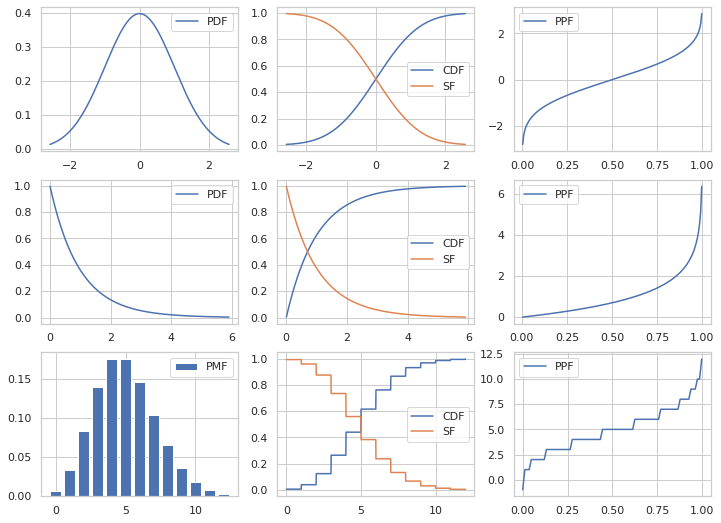

In [38]:
fig, axesall = plt.subplots(3, 3, figsize=(12, 9))

for (X, axes) in zip((stats.norm(), stats.f(2, 50), stats.poisson(5)), axesall):
    min, max = X.interval(0.99)
    space = np.linspace(min, max, 1000)

    if hasattr(X.dist, "pdf"):
        axes[0].plot(space, X.pdf(space), label='PDF')
    else:
        spaceInt = np.unique(space.astype(int))
        axes[0].bar(spaceInt, X.pmf(spaceInt), label='PMF')
    axes[1].plot(space, X.cdf(space), label='CDF')
    axes[1].plot(space, X.sf(space), label='SF')
    axes[2].plot(space, X.ppf(space), label='PPF')

    for ax in axes:
        ax.legend()

Generisanje slučajnih brojeva u skladu sa raspodelom slučajne promenljive :



In [39]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

Da se uverimo u raspodelu generisanih brojeva, prikazaćemo histograme i funkcije gustine raspodele za sledeće raspodele, sa 2000 slučajnih uzoraka :

-   Studentova t raspodela sa parametrom 7.0
-   Hi kvadrat raspodela sa parametrom 5.0
-   Eksponencijalna raspodela sa parametrom 0.5



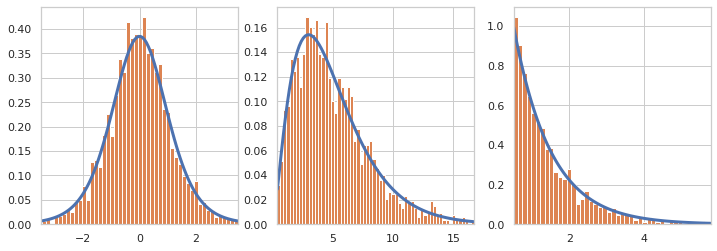

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for (X, ax) in zip((stats.t(7.0), stats.chi2(5.0), stats.expon(0.5)), axes):
    inter = X.interval(.99)
    x = np.linspace(*inter, num=100)
    ax.plot(x, X.pdf(x), label='PDF', lw=3)
    ax.hist(X.rvs(2000), label='uzorak', density=1, bins=75)
    ax.set_xlim(*inter)

Do sada se od poznate raspodele sa poznatim parametrima, generisao slučajan uzorak. Obrnut proces podrazumeva da se od slučajnog uzorka procene parametri raspodele. Metod fit radi upravo ovo.

Prvo se generiše 500 brojeva sa hi-2 raspodelom i 5 stepeni slobode :



In [41]:
X = stats.chi2(df=5)
uzorak = X.rvs(500)

Zatim se vrši ocena parametara hi-2 raspodele, kao da se ne znaju :



In [42]:
df, loc, scale = stats.chi2.fit(uzorak)
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

Zatim se definiše nova slučajna promenljiva, sa malopre procenjenim parametrima, da bi se videlo koliko bi uzorak generisan takvom promenljivom, odstupao od originalnog uzorka.



In [43]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

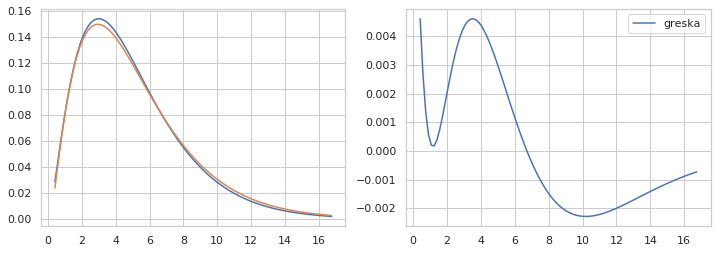

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
space = X.interval(.99)
x = np.linspace(*space, num=100)

axes[0].plot(x, X.pdf(x), label='Original')
axes[0].plot(x, Y.pdf(x), label='Ocena')
axes[0].legend

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label='greska')
axes[1].legend()

### Testiranje Hipoteza



Testiranje Hipoteza je sistematska metodologija za utvrđivanje da li je tvrdnja, ili hipoteza, razumna ili ne, na osnovu podataka. Formuliše se nulta hipoteza, H0, koja predstavlja trenutno prihvaćeno stanje, kao i alternativna hipoteza H1 koja predstavlja novo stanje. Nulta i alternativna hipoteza moraju da budu komplementarne, tako da samo jedna hipoteza može da bude tačna.

Koraci za testiranje hipoteza su sledeći :

1.  Formuliše se nulta hipoteza
2.  Izabere se takva statistika testa, da joj je raspodela poznata
3.  Prikupljaju se podaci
4.  Izračuna se test statistika iz podataka, i računa se p-vrednost za nultu hipotezu
5.  Ako je p-vrednost manja od nivoa značajnosti, odbacuje se nulta hipoteza. Ako je veća, ne odbacuje se.

Srećom, najčešći slučajevi testiranja hipoteza su poznati. Na primer, jedan česta nulta hipoteza je tvrdnja da je srednja vrednost populacije neki određeni broj.



In [45]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n = 100
X_samples = X.rvs(n)

Realizovana vrednost statistike testa :



In [46]:
z = (X_samples.mean() - mu0) / (sigma/np.sqrt(n))
z

-4.915637976521836

Nivo značajnosti testa (significance level) je maksimalna vrednost verovatnoće greške prve vrste. Često je ova vrednost 0.05.

P-vrednost je najmanji nivo značajnosti na kome bismo hipotezu H0 odbacili za realizovanu vrednost statistike.

Pomoću funkcije ppf dobijamo vrednost statistike koja odgovara nivou značajnosti datom kao parametar, a to je granična vrednost statistike, i ako je realizovana vrednost statistike manja od nje, hipoteza H0 se odbacuje.



In [47]:
stats.norm().ppf(0.025) # nivo značajnosti alpha = 0.05 = 5% (2.5% on each side)

-1.9599639845400545

Ako se statistika testa realizuje sa vrednošću čija je značajnost manja od zadatog nivoa značajnosti, tada hipotezu H0 odbacujemo. Pošto je realizovana vrednost statistike manja od granične vrednosti, odbacujemo nultu hipotezu.

Konačno, p-vrednost možemo da izračunamo :



In [48]:
2 * stats.norm().cdf(-abs(z))

8.849379778846592e-07

T raspodela, kada se ne zna varijansa populacije :



In [49]:
t = (X_samples.mean() - mu0) / (X_samples.std(ddof=1)/np.sqrt(n))
t

-4.883742747891776

p vrednost za t raspodelu :



In [50]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

4.002543252096778e-06

Umesto da se ručno računaju gornje vrednosti, mogle su da se koriste ugrađene funkcije :



In [51]:
t, p = stats.ttest_1samp(X_samples, mu0)

Test statistika :



In [52]:
t

-4.883742747891776

P vrednost :



In [53]:
p

4.002543252096778e-06

# Data Processing and Analysis



Biblioteka pandas je skup alata za obradu i analizu podataka u programskom jeziku python. Obuhvata strukture podataka i operacije za manipulaciju numeričkih tabela i vremenske serije. Pandas je slobodan softver objavljen pod BSD licencom.

Zbog toga što je jednostavna za korišćenje a u isto vreme nudi visoke performansame i fleksibilnost, pandas nalazi sve veću primenu.

Pored ove bibilioteke u nastavku ćemo koristiti numpy i pyplot kao pomoćne biblioteke.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Series

Linearna struktura podataka u biblioteci pandas je Series. U kodu koji sledi napravili smo novi objekat klase Series gde smo za početnu vrednost uzeli listu celobrojnih brojeva.

In [55]:
s = pd.Series([1166763, 150835, 260237, 277522 ])

Kada ispišemo ovu promenjivu vidimo da imamo 2 kolone. Prva pretstavlja kolonu indeksa gde se nalaze redni brojevi počevši od nule, dok druga pretstavlja listu naših podataka.

In [56]:
s

0    1166763
1     150835
2     260237
3     277522
dtype: int64

Listu indeka možemo pročitati putem atributa index. Pošto nismo naveli šta će biti listaindeksa podrazumevano će biti opseg brojeva koji kreće od broja 0 i nastavlja sa korakom 1 sve dok ne dođe do broja elemenata niza vrednosti.

In [57]:
s.index

RangeIndex(start=0, stop=4, step=1)

Analogno nizu vrednosti možemo pročitati putem atributa values.

In [58]:
s.values

array([1166763,  150835,  260237,  277522])

U narednom kodu ćemo postaviti našu listu indeksa i naziv serije podataka kako bi bilo razumljivije šta predstavljaju naši podaci

In [59]:
s.index = ["Beograd", "Kragujevac", "Niš", "Novi Sad"]

In [60]:
s.name = "Populacija"

In [61]:
s

Beograd       1166763
Kragujevac     150835
Niš            260237
Novi Sad       277522
Name: Populacija, dtype: int64

Pojedinačnim elementima u našoj seriji podataka možemo pristuputi na više načina. Jedan od načina je pomoću elementa iz liste indeksa koju smo mi definisali, npr. s["Novi Sad"], drugi način je elementa iz podrazumevane liste indeksa, npr. s[0]. Treći način je preko argumenta objekta, naime, svaki element liste indeksa koju smo mi postavili postaje po jedan atribut pomoću kojeg možemo pristupiti odgovarajućem elementu serije podataka

In [62]:
s["Novi Sad"]

277522

In [63]:
s[0]

1166763

In [64]:
# dir(s)

In [65]:
s.Niš

260237

Ukoliko umesto jednog indeksa (stringa) zadamo podlisu liste indeksa, tada ćemo dobiti odgovarajuću podseriju serije elementa 

In [66]:
s[['Kragujevac','Beograd']]

Kragujevac     150835
Beograd       1166763
Name: Populacija, dtype: int64

Pandas nudi veliki broj implementiranih standardnih funlcija:

In [67]:
s.median(), s.mean(), s.std()

(268879.5, 463839.25, 471960.9633167945)

In [68]:
s.min(), s.max()

(150835, 1166763)

In [69]:
s.quantile(q=0), s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75), s.quantile(q=1)

(150835.0, 232886.5, 268879.5, 499832.25, 1166763.0)

In [70]:
s.describe()

count    4.000000e+00
mean     4.638392e+05
std      4.719610e+05
min      1.508350e+05
25%      2.328865e+05
50%      2.688795e+05
75%      4.998322e+05
max      1.166763e+06
Name: Populacija, dtype: float64

In [71]:
s = s.sort_values()

Kodom koji sledi prikazaćemo našu seriju podataka na 4 grafika različitog tipa, a nakon toga ćemo sačuvate te grafove u pdf i png formatu

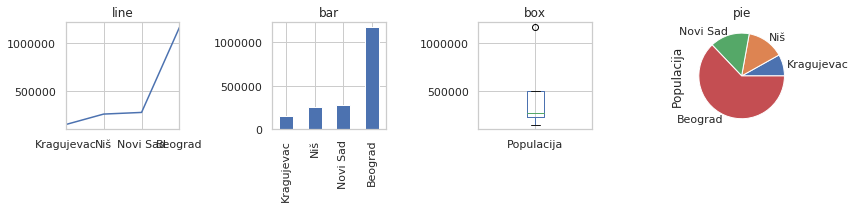

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
#fig.savefig("prez-series-plot.pdf")
#fig.savefig("prez-series-plot.png")

Pandas ima veliki funkcija koje mogu da seriju podataka da pripreme za odgovarajući format

In [73]:
print(s.to_latex())
#s.to

\begin{tabular}{lr}
\toprule
{} &  Populacija \\
\midrule
Kragujevac &      150835 \\
Niš        &      260237 \\
Novi Sad   &      277522 \\
Beograd    &     1166763 \\
\bottomrule
\end{tabular}



# DataFrame

Složenija struktura podataka od Series u biblioteci pandas je DataFrame. Ona pretstavlja tabelu ka više kolona (Series objekata). U kodu koji sledi napravili smo novi objekat klase DataFrame gde smo za početnu vrednost uzeli listu celobrojnih brojeva koji pretstavljaju broj stanovnika u glavnim gradovima i listu naziva na čije glavne gradove se to odnosi. Podatke možemo uneti kao dve liste ili kao više lista sa po dva elementa. 

Kao što primećujemo nazive kolona i indeksi će biti numerisani brojevi počevši od 0.

In [74]:
df = pd.DataFrame([[1166763, 275524, 792875, 150977],
                   ["Srbija", "Bosna i Hercegovina", "Hrvatska", "Crna Gora"]])

In [75]:
df

0                    1         2          3
0  1166763               275524    792875     150977
1   Srbija  Bosna i Hercegovina  Hrvatska  Crna Gora

In [76]:
df = pd.DataFrame([[1166763, "Srbija"],
                   [275524, "Bosna i Hercegovina"], 
                   [792875, "Hrvatska"],
                   [150977, "Crna Gora"]])

In [77]:
df

0                    1
0  1166763               Srbija
1   275524  Bosna i Hercegovina
2   792875             Hrvatska
3   150977            Crna Gora

Lista indeksa se postavlja identično kao i kod Series, takođe sada možemo postaviti i nazive kolona

In [78]:
df.index = ["Beograd", "Sarajevo", "Zagreb", "Podgorica"]

In [79]:
df.columns = ["Stanovništvo", "Država"]

In [80]:
df

Stanovništvo               Država
Beograd         1166763               Srbija
Sarajevo         275524  Bosna i Hercegovina
Zagreb           792875             Hrvatska
Podgorica        150977            Crna Gora

Sve ovo je moglo da se unese pri samom kreiranju objekta tako što bi se kao prvi parametar poslao rečnik kojod kog bi saki element prestavljao jednu kolonu gde bi naziv elementa prestavljao naziv kolone a vrednost elementa bi bila lista vrednosti te kolone, i kao drugi parametar konstruktora bi se navela lista koja definiše nazive indeksa.

In [81]:
df = pd.DataFrame({"Stanovništvo": [1166763, 275524, 792875, 150977],
                   "Država": ["Srbija", "Bosna i Hercegovina", "Hrvatska", "Crna Gora"]},
                  index=["Beograd", "Sarajevo", "Zagreb", "Podgorica"])

In [82]:
df

Stanovništvo               Država
Beograd         1166763               Srbija
Sarajevo         275524  Bosna i Hercegovina
Zagreb           792875             Hrvatska
Podgorica        150977            Crna Gora

Slično kao kod Series, i DataFrame ima funkcije za konverziju u različite tipove podataka, argumente preko kojih se pristupa listi indeksa, kolona, vrednosti, kao i argumente za svaki pojedinačnu kolonu kojim se pristupa seriji podataka, kao i mnogobrojne implementirane funkcije za opisivanje samih podataka.

In [83]:
print(df.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  Stanovništvo &               Država \\
\midrule
Beograd   &       1166763 &               Srbija \\
Sarajevo  &        275524 &  Bosna i Hercegovina \\
Zagreb    &        792875 &             Hrvatska \\
Podgorica &        150977 &            Crna Gora \\
\bottomrule
\end{tabular}



In [84]:
df.index

Index(['Beograd', 'Sarajevo', 'Zagreb', 'Podgorica'], dtype='object')

In [85]:
df.columns

Index(['Stanovništvo', 'Država'], dtype='object')

In [86]:
df.values

array([[1166763, 'Srbija'],
       [275524, 'Bosna i Hercegovina'],
       [792875, 'Hrvatska'],
       [150977, 'Crna Gora']], dtype=object)

In [87]:
df.Stanovništvo

Beograd      1166763
Sarajevo      275524
Zagreb        792875
Podgorica     150977
Name: Stanovništvo, dtype: int64

In [88]:
df["Stanovništvo"]

Beograd      1166763
Sarajevo      275524
Zagreb        792875
Podgorica     150977
Name: Stanovništvo, dtype: int64

In [89]:
type(df.Stanovništvo)

pandas.core.series.Series

In [90]:
df.Stanovništvo.Beograd

1166763

In [91]:
#df.Beograd
#df.ix["Beograd"]
df.loc["Beograd"]

Stanovništvo    1166763
Država           Srbija
Name: Beograd, dtype: object

In [92]:
df.loc[["Beograd", "Zagreb"]]

Stanovništvo    Država
Beograd       1166763    Srbija
Zagreb         792875  Hrvatska

In [93]:
df.loc[["Beograd", "Zagreb"], "Stanovništvo"]

Beograd    1166763
Zagreb      792875
Name: Stanovništvo, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Beograd to Podgorica
Data columns (total 2 columns):
Stanovništvo    4 non-null int64
Država          4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [95]:
df.mean()

Stanovništvo    596534.75
dtype: float64

In [96]:
df.dtypes

Stanovništvo     int64
Država          object
dtype: object

In [97]:
df.head(3)

Stanovništvo               Država
Beograd        1166763               Srbija
Sarajevo        275524  Bosna i Hercegovina
Zagreb          792875             Hrvatska

# Primer iz knjige

U narednom delu ćemo učitati dataset u kome se nalaze podaci o stanovništvu evropskih gradova i obradićemo te podatke.

Za početak moramo da vidimo kako su zapisani podaci u csv fajl, a nakon toga da ih učitamo pomoću funkcije read_csv is pandas biblioteke.

In [98]:
!head  ./datasets/european_cities.csv

Rank,City,State,Population,Date of census
1,London, United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014
5,Paris, France,"2,273,305",1 January 2013
6,Bucharest, Romania,"1,883,425",20 October 2011
7,Vienna, Austria,"1,794,770",1 January 2015
8,Hamburg, Germany,"1,746,342",30 December 2013
9,Budapest, Hungary,"1,744,665",1 January 2014


In [99]:
pop = pd.read_csv("datasets/european_cities.csv") #, delimiter=",", encoding="utf-8", header=0)

Funkcija head će nam prikazati prvih 5 elemenata DataFrame-a, to je podrazumevani broj ali možemo poslati funkcije željeni broj kao argument.

In [100]:
pop.head()

Rank    City            State Population     Date of census
0     1  London   United Kingdom  8,615,246        1 June 2014
1     2  Berlin          Germany  3,437,916        31 May 2014
2     3  Madrid            Spain  3,165,235     1 January 2014
3     4    Rome            Italy  2,872,086  30 September 2014
4     5   Paris           France  2,273,305     1 January 2013

Funkcija head će nam vratiti podatke o DataFrame objektu i šta su indeksi i šta su kolone (kako se zovu i koja su vrsta podatka)

In [101]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank              105 non-null int64
City              105 non-null object
State             105 non-null object
Population        105 non-null object
Date of census    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Pošto su podaci o broju stanovnika stringovi koji sadrže zareze napravićemo novu kolonu NumericPopulation u koju ćemu uzeti podatke iz postojeće kolone o stanovništvu i na njima primeniti fukciju koja uklanja zareze i konvertuje u celobrojni tip podataka

Slično ćemo uraditi sa kolonom State kod koje podaci počinju sa znakom razmaka

In [102]:
def f(x):
    return int(x.replace(',',''))

pop["NumericPopulation"] = pop.Population.apply(f) #lambda

In [103]:
pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [104]:
pop["State"] = pop["State"].apply(lambda x: x.lstrip())

In [105]:
pop.head()

Rank    City           State Population     Date of census  \
0     1  London  United Kingdom  8,615,246        1 June 2014   
1     2  Berlin         Germany  3,437,916        31 May 2014   
2     3  Madrid           Spain  3,165,235     1 January 2014   
3     4    Rome           Italy  2,872,086  30 September 2014   
4     5   Paris          France  2,273,305     1 January 2013   

   NumericPopulation  
0            8615246  
1            3437916  
2            3165235  
3            2872086  
4            2273305

In [106]:
pop.dtypes

Rank                  int64
City                 object
State                object
Population           object
Date of census       object
NumericPopulation     int64
dtype: object

Neku od kolona možemo pretvoriti u indeks kolonu tako što ćemo pozvati funkciju set_index i kao argument joj poslati naziv te kolone ili listu sa nazivima kolona koje želimo da postanu indeks kolone.

Sortiranje podataka po indeksu se radi funkcijom sort_index. opcionim argumentom level određujemo po kojoj indeks koloni da sortira podatke. Podrazumevana vrednost za argument level je 0.

In [107]:
pop2 = pop.set_index("City").sort_index()
pop2

Rank        State Population    Date of census  NumericPopulation
City                                                                        
Aarhus       92      Denmark    326,676    1 October 2014             326676
Alicante     86        Spain    334,678    1 January 2012             334678
Amsterdam    23  Netherlands    813,562       31 May 2014             813562
Antwerp      59      Belgium    510,610    1 January 2014             510610
Athens       34       Greece    664,046       24 May 2011             664046
...         ...          ...        ...               ...                ...
Wrocław      35       Poland    632,432     31 March 2014             632432
Wuppertal    83      Germany    342,885  31 December 2012             342885
Zagreb       24      Croatia    790,017     31 March 2011             790017
Zaragoza     33        Spain    666,058    1 January 2014             666058
Łódź         28       Poland    709,757     31 March 2014             709757

[105 rows x 5 columns]

In [108]:
pop3 = pop.set_index(["State", "City"]).sort_index(level=0)
pop3.head(8)
#unique()

Rank Population    Date of census  NumericPopulation
State          City                                                          
Austria        Vienna       7  1,794,770    1 January 2015            1794770
Belgium        Antwerp     59    510,610    1 January 2014             510610
               Brussels    16  1,175,831    1 January 2014            1175831
Bulgaria       Plovdiv     84    341,041  31 December 2013             341041
               Sofia       14  1,291,895  14 December 2014            1291895
               Varna       85    335,819  31 December 2013             335819
Croatia        Zagreb      24    790,017     31 March 2011             790017
Czech Republic Brno        76    378,327    1 January 2013             378327

In [109]:
pop3.loc['Sweden']

Rank Population   Date of census  NumericPopulation
City                                                           
Gothenburg    53    528,014    31 March 2013             528014
Malmö        102    309,105    31 March 2013             309105
Stockholm     20    909,976  31 January 2014             909976

In [110]:
pop3.loc["Germany"][lambda x: x["NumericPopulation"] >= 500000]

Rank Population    Date of census  NumericPopulation
City                                                            
Berlin         2  3,437,916       31 May 2014            3437916
Bremen        49    546,451  31 December 2012             546451
Cologne       18  1,034,175  31 December 2013            1034175
Dortmund      42    575,944  31 December 2013             575944
Dresden       52    530,754  31 December 2013             530754
Düsseldorf    42    593,682  31 December 2012             593682
Essen         43    569,884  31 December 2013             569884
Frankfurt     29    701,350  31 December 2013             701350
Hamburg        8  1,746,342  30 December 2013            1746342
Hanover       56    514,137  31 December 2012             514137
Leipzig       51    531,562  31 December 2013             531562
Munich        12  1,407,836  31 December 2013            1407836
Stuttgart     39    604,297  31 December 2013             604297

In [111]:
pop3.head()

Rank Population    Date of census  NumericPopulation
State    City                                                          
Austria  Vienna       7  1,794,770    1 January 2015            1794770
Belgium  Antwerp     59    510,610    1 January 2014             510610
         Brussels    16  1,175,831    1 January 2014            1175831
Bulgaria Plovdiv     84    341,041  31 December 2013             341041
         Sofia       14  1,291,895  14 December 2014            1291895

Ako koloni dodelimu jednu vrednost, tada će se ta vrednost kopirati u svim redovima te kolone.

Brisanje kolone se postiže pomoću funkcije drop kojoj se kao argument columns šalju kolone koje je potrebno izostaviti.

In [112]:
pop3['Max'] = 1000000

In [113]:
pop3 = pop3.drop(columns='Max')

Sortiranje vrednosti se radi funkcijom sort_values kojoj se kao argument by (prvi argument) šalju nazivi kolona po kojima treba sortirati, a postoji i argument ascending preko kojeg se zadaje koju kolonu treba a ko ne treba soritirati u rastućem poretku.

In [114]:
pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

Rank           State Population Date of census  NumericPopulation
City                                                                         
Nottingham   103  United Kingdom    308,735   30 June 2012             308735
Wirral        97  United Kingdom    320,229   30 June 2012             320229
Coventry      94  United Kingdom    323,132   30 June 2012             323132
Wakefield     91  United Kingdom    327,627   30 June 2012             327627
Leicester     87  United Kingdom    331,606   30 June 2012             331606

Funkcija value_counts vraća Series objekat u kom su indeksi različiti elementi kolone za koju je pozvana ova funkcija a vrednost na koju ukazuje indekst predstavlja broj pojavljivanja tog indeksa u koloni za koju je pozvana funkcija.

In [115]:
city_counts = pop.State.value_counts()
city_counts.name = f"TOP { city_counts.sum() }"
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Italy             10
Poland            10
Name: TOP 105, dtype: int64

In [116]:
pop3 = pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
pop3.head(8)

NumericPopulation
State          City                        
United Kingdom London               8615246
Germany        Berlin               3437916
Spain          Madrid               3165235
Italy          Rome                 2872086
France         Paris                2273305
Romania        Bucharest            1883425
Austria        Vienna               1794770
Germany        Hamburg              1746342

In [117]:
pop4 = pop3.sum(level="State").sort_values(by="NumericPopulation", ascending=False)
pop4.head()

NumericPopulation
State                            
United Kingdom           16011877
Germany                  15119548
Spain                    10041639
Italy                     8764067
Poland                    6267409

In [118]:
pop4['City Counts'] = city_counts

In [119]:
pop4.head() #['NumericPopulation']

NumericPopulation  City Counts
State                                         
United Kingdom           16011877           16
Germany                  15119548           19
Spain                    10041639           13
Italy                     8764067           10
Poland                    6267409           10

In [120]:
pop5 = pop4.sort_values(by='City Counts',ascending=False)
pop5.head() #['City Counts']

NumericPopulation  City Counts
State                                         
Germany                  15119548           19
United Kingdom           16011877           16
Spain                    10041639           13
Italy                     8764067           10
Poland                    6267409           10

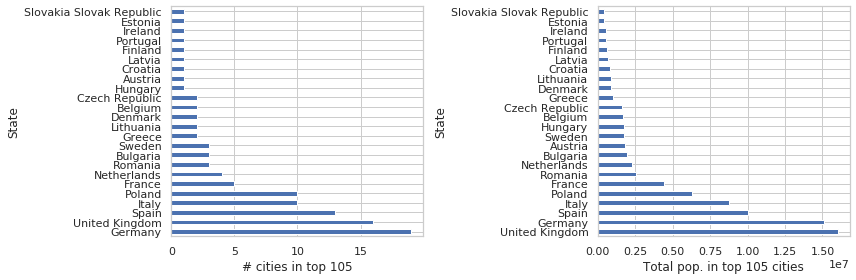

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

pop5['City Counts'].plot(kind='barh', ax=ax1)
ax1.set_xlabel(f"# cities in top {pop5['City Counts'].sum()}")

pop4['NumericPopulation'].plot(kind='barh', ax=ax2)
ax2.set_xlabel(f"Total pop. in top {pop5['City Counts'].sum()} cities")

fig.tight_layout()
#fig.savefig("state-city-counts-sum.pdf")

# Time series

Time series je vremenski tip podataka u pandas biblioteci.

In [122]:
import datetime

Funkcija date_range nam vraca DatetimeIndex objekat kome moyemo da postavimo pocetni datum kao prvi parametar funkcije i argumentom periods da definifemo ya koliko dana želimo da se generiše lista dana

In [123]:
pd.date_range("2019-1-1", periods=31) 
#"2019-1-1"   ===  datetime.datetime(2019, 1, 1)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')

Alternativno, možemo da kao drugi parametar da definišemo vreme na kraju niza i argumentom freq da definišemo frekvenciju, D za dane, H za sate, M za mesece, itd.

In [124]:
pd.date_range("2019-1-1 00:00", "2019-1-1 12:00", freq="H")

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [125]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2019-1-1", periods=31))

ts1.head()

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
Freq: D, dtype: int64

In [126]:
ts2 = pd.Series(np.random.rand(2),index=[datetime.datetime(2019, 1, 1), datetime.datetime(2019, 2, 1)])
ts2

2019-01-01    0.900297
2019-02-01    0.469001
dtype: float64

In [127]:
ts2.index

DatetimeIndex(['2019-01-01', '2019-02-01'], dtype='datetime64[ns]', freq=None)

Pored DatatimeIndex postoji i PeriodIndex koji ima slične osobine.

In [128]:
pd.date_range("2019-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', freq='M')

Za svaki element datuma i vremena postoji zaseban argument preko kog može da se pristupi traženom delu podatka:

In [129]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day, ts1.index[2].nanosecond
#ts1.index[2].to_pydatetime()

(2019, 1, 3, 0)

# Time primer

U narednom primeru učitaćemo dataset-ove u kojima se nalaze podaci za temperaturu unutar zatvorene prostorije i napolju mereni rokom 2014 godine frekfencijom od par minuta na lokaciji u Stockholm, Europe

In [130]:
!head -n 5 datasets/temperature_outdoor_2014.csv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [131]:
df1 = pd.read_csv('datasets/temperature_outdoor_2014.csv', delimiter="\t", names=["time", "outdoor"])

In [132]:
df2 = pd.read_csv('datasets/temperature_indoor_2014.csv', delimiter="\t", names=["time", "indoor"])

In [133]:
df1.head()

time  outdoor
0  1388530986     4.38
1  1388531586     4.25
2  1388532187     4.19
3  1388532787     4.06
4  1388533388     4.06

In [134]:
df2.head()

time  indoor
0  1388530986   21.94
1  1388531586   22.00
2  1388532187   22.00
3  1388532787   22.00
4  1388533388   22.00

In [135]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time")

In [136]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")

In [137]:
df1.head()

outdoor
time                              
2014-01-01 00:03:06+01:00     4.38
2014-01-01 00:13:06+01:00     4.25
2014-01-01 00:23:07+01:00     4.19
2014-01-01 00:33:07+01:00     4.06
2014-01-01 00:43:08+01:00     4.06

In [138]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [139]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [140]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [141]:
df2_jan = df2["2014-1-1":"2014-1-31"]

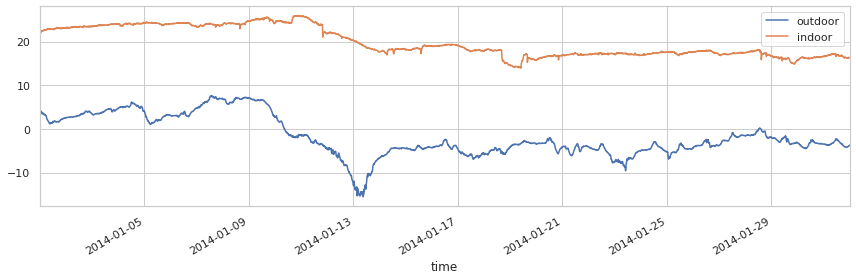

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
#fig.savefig("ch12-timeseries-selected-month.pdf")

## Grupisanje po mesecima

U narednom delu ćemo izračunati srednje vrednosti temeprature po mesecima

In [143]:
df1_month = df1.reset_index()

In [144]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [145]:
df1_month.head()

time  outdoor  month
0 2014-01-01 00:03:06+01:00     4.38      1
1 2014-01-01 00:13:06+01:00     4.25      1
2 2014-01-01 00:23:07+01:00     4.19      1
3 2014-01-01 00:33:07+01:00     4.06      1
4 2014-01-01 00:43:08+01:00     4.06      1

In [146]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df1_month.head()

outdoor
month           
1      -1.776646
2       2.231613
3       4.615437
4       8.105193
5      12.261396

Nakon toga ćemo isti postupak ponoviti i za podatke indoor podatke

In [147]:
df2_month = df2.reset_index()

df2_month["month"] = df2_month.time.apply(lambda x: x.month)

df2_month = df2_month.groupby("month").aggregate(np.mean)

I na kraju ćemo spojiti te dve kolone

In [148]:
df_month = df1_month.join(df2_month)

In [149]:
df_month.head(3)

outdoor     indoor
month                     
1     -1.776646  19.862590
2      2.231613  20.231507
3      4.615437  19.597748

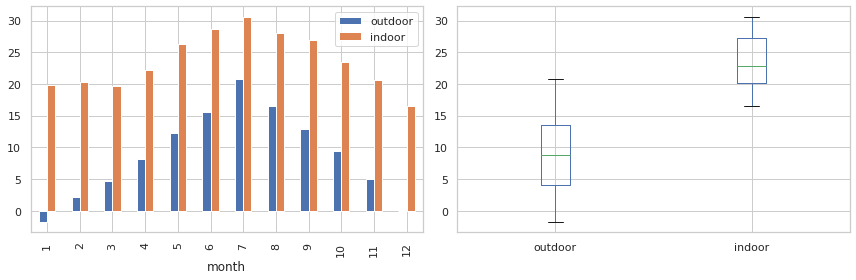

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
#fig.savefig("ch12-grouped-by-month.pdf")

In [151]:
df_month

outdoor     indoor
month                      
1      -1.776646  19.862590
2       2.231613  20.231507
3       4.615437  19.597748
4       8.105193  22.149754
5      12.261396  26.332160
6      15.586955  28.687491
7      20.780314  30.605333
8      16.494823  28.099068
9      12.823905  26.950366
10      9.352000  23.379460
11      4.992142  20.610365
12     -0.058940  16.465674